In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../Analysis/"))))

import bpepi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import numpy as np
import random

from IPython import display
import matplotlib.animation as animation

from bpepi.Modules import fg as fg
from gen import generate_contacts

import bpepi.Modules
import importlib

# Functions

In [2]:
def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

def f_iterate(n):
    for _ in range(n-1):
        fg_.iterate(damp=damping)
    return fg_.iterate(damp=damping)

def rand_jump(jump):
    return max(int(np.random.normal(jump,jump*0.2)),1)

In [3]:
def iter_selector(T):
    if(T<=90):
        in_it=T-2
        j1=1
        j2=1
        add_it1=1
        add_it2=1
    elif(T>90 & T<=500):
        in_it=30
        add_it1=30
        add_it2=30
        j1 = (T-30)/90
        j2 = 2*j1
    elif(T>500 & T<=5000):
        in_it=30
        add_it1=30
        add_it2=30
        j1 = (T-60)/180
        j2 = 5*j1
    else:
        in_it=30
        add_it1=30
        add_it2=30
        j1 = (T-110)/330
        j2 = 10*j1
    j1 = int(np.round(j1))
    j2 = int(np.round(j2))

    iter=in_it+add_it1*j1+add_it2*j2 
    print(f"total iterations: {iter}")
    return in_it, j1, add_it1, j2, add_it2, iter

In [4]:
def plot_oneline():
    sns.set_theme(style="whitegrid", font_scale=1.5)
    fig = plt.figure( figsize=(30,15))
    gs = fig.add_gridspec(2,N+2)
    axs=[]
    for i in range(N):
        axs.append(fig.add_subplot(gs[0, i]))
    axs.append(fig.add_subplot(gs[0, N:]))
    axs.append(fig.add_subplot(gs[1, :]))
    plt.suptitle(r"Node 0 observed, with $t_i = 1$, damping = " + f"{damping}" )
    for i in range(N):
        axs[i].set_xlabel(r"$t_i$")
        axs[i].set_ylabel(r"$b_i(t)$")
        axs[i].set_title(f"Node {i}")
        axs[i].set_xlim(-1,T)
        axs[i].set_ylim(0,1)
    axs[-1].set_xlabel("iteration")
    axs[-1].set_ylabel("error")
    line_err, = axs[-1].plot([],[])
    #ax.legend(loc=2)
    axs[-1].set_ylim(ymin[0],ymax[0])
    if ymin[0] < 1e-9: axs[-1].set_yscale("symlog")
    else: axs[-1].set_yscale("log")
    line = [axs[i].plot(xx, yy[0][i])[0] for i in range(N)]
    nx.draw_planar(G, with_labels=True,ax=axs[-2],node_size=600, font_size=15)
    plt.tight_layout()
    line.append(line_err)
    def init():
        for i,l in enumerate(line[:-1]):
            l.set_data(xx, yy[0][i])  # update the data.
        line[0].set_label(lab[0]) # update the legend
        axs[0].legend(loc=1)
        return line
    def animate(i):
        line[-1].set_data(xx_err[:i+1], yy_err[:i+1])  # update the data.# update the legend
        axs[-1].set_xlim(-0.001,xx_err[i])
        #axs[-1].set_ylim(yy_min,0.003)
        for j,l in enumerate(line[:-1]):
            l.set_data(xx, yy[i][j])  # update the data.+ 
        line[0].set_label(lab[i]) # update the legend
        axs[0].legend(loc=1)
        axs[-1].set_ylim(ymin[i],ymax[i])
        if ymin[i] < 1e-9: axs[-1].set_yscale("symlog")
        else: axs[-1].set_yscale("log")
        #ax.set_xlim(0,i)
        #ax.legend(loc=2)

        return line

    ani = animation.FuncAnimation(
        fig, animate,  init_func=init, interval=200, frames=iter, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)

In [5]:
def plot_twolines():
    sns.set_theme(style="whitegrid", font_scale=1.5)
    fig = plt.figure( figsize=(26,15))
    gs = fig.add_gridspec(3,int(N/2)+2)
    axs=[]
    for i in range(int(N/2)):
        axs.append(fig.add_subplot(gs[0, i]))
        axs.append(fig.add_subplot(gs[1, i]))
    axs.append(fig.add_subplot(gs[:2, int(N/2):]))
    axs.append(fig.add_subplot(gs[2, :]))
    plt.suptitle(r"Node 0 observed, with $t_i = $" + f"{t_i}" + ", damping = " + f"{damping}" )
    for i in range(N):
        axs[i].set_xlabel(r"$t_i$")
        axs[i].set_ylabel(r"$b_i(t)$")
        axs[i].set_title(f"Node {i}")
        axs[i].set_xlim(-1,T)
        axs[i].set_ylim(0,1)
    axs[-1].set_xlabel("iteration")
    axs[-1].set_ylabel("error")
    line_err, = axs[-1].plot([],[])
    #ax.legend(loc=2)
    axs[-1].set_ylim(ymin[0],ymax[0])
    if ymin[0] < 1e-9: axs[-1].set_yscale("symlog")
    else: axs[-1].set_yscale("log")
    line = [axs[i].plot(xx, yy[0][i])[0] for i in range(N)]
    nx.draw_planar(G, with_labels=True,ax=axs[-2],node_size=600, font_size=15)
    plt.tight_layout()
    line.append(line_err)
    def init():
        for i,l in enumerate(line[:-1]):
            l.set_data(xx, yy[0][i])  # update the data.
        line[0].set_label(lab[0]) # update the legend
        axs[0].legend(loc=1)
        return line
    def animate(i):
        line[-1].set_data(xx_err[:i+1], yy_err[:i+1])  # update the data.# update the legend
        axs[-1].set_xlim(-0.001,xx_err[i])
        #axs[-1].set_ylim(yy_min,0.003)
        for j,l in enumerate(line[:-1]):
            l.set_data(xx, yy[i][j])  # update the data.+ 
        line[0].set_label(lab[i]) # update the legend
        axs[0].legend(loc=1)
        axs[-1].set_ylim(ymin[i],ymax[i])
        if ymin[i] < 1e-9: axs[-1].set_yscale("symlog")
        else: axs[-1].set_yscale("log")
        #ax.set_xlim(0,i)
        #ax.legend(loc=2)

        return line

    ani = animation.FuncAnimation(
        fig, animate,  init_func=init, interval=200, frames=iter, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)

In [6]:
def plot_marg(n_x,n_y):
    n_nodes=min(n_x*n_y,N)
    sns.set_theme(style="whitegrid", font_scale=1.5)
    fig = plt.figure( figsize=(4*(n_x+2),4*(n_y+1)))
    gs = fig.add_gridspec(n_y+1,n_x+2)
    axs=[]
    for j in range(n_y):
        for i in range(n_x):
            axs.append(fig.add_subplot(gs[j, i]))
    axs.append(fig.add_subplot(gs[:n_y, n_x:]))
    axs.append(fig.add_subplot(gs[n_y, :]))
    plt.suptitle(r"Node 0 observed with $t_i = $" + f"{t_i}" + ", damping = " + f"{damping}" )
    for i in range(n_nodes):
        axs[i].set_xlabel(r"$t_i$")
        axs[i].set_ylabel(r"$b_i(t_i)$")
        axs[i].set_title(f"Node {i}")
        axs[i].set_xlim(-1,T)
        axs[i].set_ylim(0,1)
    axs[-1].set_xlabel("iteration")
    axs[-1].set_ylabel("error")
    line_err, = axs[-1].plot([],[])
    #ax.legend(loc=2)
    axs[-1].set_ylim(ymin[0],ymax[0])
    if ymin[0] < 1e-9: axs[-1].set_yscale("symlog")
    else: axs[-1].set_yscale("log")
    line = [axs[i].plot(xx, yy[0][i])[0] for i in range(n_nodes)]
    nx.draw_planar(G, with_labels=True,ax=axs[-2],node_size=600, font_size=15)
    plt.tight_layout()
    line.append(line_err)
    def init():
        for i,l in enumerate(line[:-1]):
            l.set_data(xx, yy[0][i])  # update the data.
        line_err.set_label(lab[0]) # update the legend
        axs[-1].legend(loc=1)
        return line
    def animate(i):
        line[-1].set_data(xx_err[:i+1], yy_err[:i+1])  # update the data.# update the legend
        axs[-1].set_xlim(-0.001,xx_err[i])
        #axs[-1].set_ylim(yy_min,0.003)
        for j,l in enumerate(line[:-1]):
            l.set_data(xx, yy[i][j])  # update the data.+ 
        line_err.set_label(lab[i]) # update the legend
        axs[-1].legend(loc=1)
        axs[-1].set_ylim(ymin[i],ymax[i])
        if ymin[i] < 1e-9: axs[-1].set_yscale("symlog")
        else: axs[-1].set_yscale("log")
        #ax.set_xlim(0,i)
        #ax.legend(loc=2)

        return line
    if (T_stop>90): interval=200
    else:
        interval = np.min([1000,int(np.floor(18000/T_stop))])
    ani = animation.FuncAnimation(
        fig, animate,  init_func=init, interval=interval, frames=it_sum, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)

In [7]:
def plot_pair_marg(n_x,n_y):
    n_nodes=min(n_x*n_y,N)
    sns.set_theme(style="whitegrid", font_scale=1.5)
    fig = plt.figure( figsize=(4*(n_x+2),4*(n_y+1)))
    gs = fig.add_gridspec(n_y+1,n_x+2)
    axs=[]
    for j in range(n_y):
        for i in range(n_x):
            axs.append(fig.add_subplot(gs[j, i]))
    axs.append(fig.add_subplot(gs[:n_y, n_x:]))
    axs.append(fig.add_subplot(gs[n_y, :]))
    plt.suptitle(r"Node 0 observed with $t_i = $" + f"{t_i}" + ", damping = " + f"{damping}" )
    for i,e in enumerate(list(G.edges)):
        axs[i].set_xlabel(r"$t_i$")
        axs[i].set_ylabel(r"$t_j$")
        axs[i].set_title(f"Edge ({e[0]},{e[1]})")
        axs[i].set_xlim(-1.5,T+0.5)
        axs[i].set_ylim(-1.5,T+0.5)
        axs[i].set_xticks(np.arange(-1,T+1))
        axs[i].set_yticks(np.arange(-1,T+1))
    axs[-1].set_xlabel("iteration")
    axs[-1].set_ylabel("error")
    line_err, = axs[-1].plot([],[])
    #ax.legend(loc=2)
    axs[-1].set_ylim(ymin[0],ymax[0])
    if ymin[0] < 1e-9: axs[-1].set_yscale("symlog")
    else: axs[-1].set_yscale("log")
    line = [axs[i].imshow(yy_pair[0][i],extent=(-1.5,T+0.5,T+0.5,-1.5), vmin=0, vmax=1) for i,e in enumerate(list(G.edges))]
    nx.draw_planar(G, with_labels=True,ax=axs[-2],node_size=600, font_size=15)
    plt.tight_layout()
    line.append(line_err)
    cbar = fig.colorbar(line[0], ax=axs[:-2])
    cbar.set_label(r'$p(t_i,t_j)$')
    def init():
        for i,l in enumerate(line[:-1]):
            l.set_data(yy_pair[0][i])  # update the data.
        line[-1].set_label(lab[0]) # update the legend
        axs[-1].legend(loc=1)
        return line
    def animate(i):
        line[-1].set_data(xx_err[:i+1], yy_err[:i+1])  # update the data.# update the legend
        axs[-1].set_xlim(-0.001,xx_err[i]) 
        #axs[-1].set_ylim(yy_min,0.003)
        for j,l in enumerate(line[:-1]):
            l.set_data(yy_pair[i][j])  # update the data.+ 
        line[-1].set_label(lab[i]) # update the legend
        axs[-1].legend(loc=1)
        axs[-1].set_ylim(ymin[i],ymax[i])
        if ymin[i] < 1e-9: axs[-1].set_yscale("symlog")
        else: axs[-1].set_yscale("log")
        #ax.set_xlim(0,i)
        #ax.legend(loc=2)

        return line
    if (T_stop>90): interval=200
    else:
        interval = np.min([1000,int(np.floor(18000/T_stop))])
    ani = animation.FuncAnimation(
        fig, animate,  init_func=init, interval=interval, frames=it_sum, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)

In [8]:
def plot_mess(n_x,n_y):
    n_nodes=min(n_x*n_y,N)
    sns.set_theme(style="whitegrid", font_scale=1.5)
    fig = plt.figure( figsize=(4*(n_x+2),4*(n_y+1)))
    gs = fig.add_gridspec(n_y+1,n_x+2)
    axs=[]
    for j in range(n_y):
        for i in range(n_x):
            axs.append(fig.add_subplot(gs[j, i]))
    axs.append(fig.add_subplot(gs[:n_y, n_x:]))
    axs.append(fig.add_subplot(gs[n_y, :]))
    plt.suptitle(r"Node 0 observed with $t_i = $" + f"{t_i}" + ", damping = " + f"{damping}" )
    for i,e in enumerate(directed_edges):
        axs[i].set_xlabel(r"$t_i$")
        axs[i].set_ylabel(r"$t_j$")
        axs[i].set_title(f"Edge ({e[0]},{e[1]})")
        axs[i].set_xlim(-1.5,T+0.5)
        axs[i].set_ylim(-1.5,T+0.5)
        axs[i].set_xticks(np.arange(-1,T+1))
        axs[i].set_yticks(np.arange(-1,T+1))
    axs[-1].set_xlabel("iteration")
    axs[-1].set_ylabel("error")
    line_err, = axs[-1].plot([],[])
    #ax.legend(loc=2)
    axs[-1].set_ylim(ymin[0],ymax[0])
    if ymin[0] < 1e-9: axs[-1].set_yscale("symlog")
    else: axs[-1].set_yscale("log")
    line=[]
    for i,e in enumerate(directed_edges):
        line.append(axs[i].imshow(yy_mess[0][i],extent=(-1.5,T+0.5,T+0.5,-1.5), vmin=0, vmax=1))
    nx.draw_planar(G, with_labels=True,ax=axs[-2],node_size=600, font_size=15)
    plt.tight_layout()
    line.append(line_err)
    cbar = fig.colorbar(line[0], ax=axs[:-2])
    cbar.set_label(r'$m_{i\rightarrow j}$')
    def init():
        for i,l in enumerate(line[:-1]):
            l.set_data(yy_mess[0][i])  # update the data.
        line[-1].set_label(lab[0]) # update the legend
        axs[-1].legend(loc=1)
        return line
    def animate(i):
        line[-1].set_data(xx_err[:i+1], yy_err[:i+1])  # update the data.# update the legend
        axs[-1].set_xlim(-0.001,xx_err[i])
        #axs[-1].set_ylim(yy_min,0.003)
        for j,l in enumerate(line[:-1]):
            l.set_data(yy_mess[i][j])  # update the data.+ 
        line[-1].set_label(lab[i]) # update the legend
        axs[-1].legend(loc=1)
        axs[-1].set_ylim(ymin[i],ymax[i])
        if ymin[i] < 1e-9: axs[-1].set_yscale("symlog")
        else: axs[-1].set_yscale("log")
        #ax.set_xlim(0,i)
        #ax.legend(loc=2)

        return line
    if (T_stop>90): interval=200
    else:
        interval = np.min([1000,int(np.floor(18000/T_stop))])
    ani = animation.FuncAnimation(
        fig, animate,  init_func=init, interval=interval, frames=it_sum, blit=True)

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)

# Choose the Graph
### (and set obs)

##### Sketch:

In [131]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)

G.add_edge(0,4)
G.add_edge(4,5)
G.add_edge(5,6)

G.add_edge(0,7)
G.add_edge(7,8)
G.add_edge(8,9)

G.add_edge(0,10)
G.add_edge(10,11)
G.add_edge(11,12)

obs=[[0,0,2], [0,1,3]]
#obs=[[0,0,9], [0,1,10],[2,0,7], [2,1,8]]

t_i=2
T=10

## Random Regular Graph

In [66]:
G = nx.random_regular_graph(d=3,n=1000)
list(G.edges())[:6]

[(549, 736), (549, 453), (549, 804), (736, 665), (736, 241), (633, 964)]

In [68]:
#G = nx.random_regular_graph(d=3,n=1000)
obs=[[525,0,9], [525,1,10]]
obs2=[[525,0,9], [525,1,10],[608,0,10], [608,1,11],[494,0,10], [494,1,11]]
#obs2=[[62,0,9], [62,1,10],[356,0,9], [618,1,10]]
T=12
lam=1
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
contacts = generate_contacts(G,T,lam)

## 2-nested loops on a path

### $t_i=1$

#### 2+2-loops

In [17]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)

def add_n_loops(n):
    for i in range(3,n+3):
        G.add_edge(0,i)
        G.add_edge(i,2) 

add_n_loops(1)
obs=[[0,0,1], [0,1,2]]
t_i=1
T=4

### $t_i=2$

#### 3+3-loops

In [9]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)

def add_n_loops(n):
    for i in range(4,n+4):
        G.add_edge(0,i)
        G.add_edge(i,n+i)
        G.add_edge(n+i,3) 

add_n_loops(1)
obs=[[0,0,2], [0,1,3]]

t_i=2
T=6

### $t_i=4$

#### 5+5-loops

In [36]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)

def add_n_loops(n):
    for i in range(6,n+6):
        G.add_edge(0,i)
        G.add_edge(i,n+i)
        G.add_edge(n+i,n+n+i)
        G.add_edge(n+n+i,n+n+n+i)
        G.add_edge(n+n+n+i,5) 

add_n_loops(1)
obs=[[0,0,3], [0,1,4],]
t_i=4
T=11

### $t_i=9$

#### 2+3-loops

In [1684]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(4,11)
G.add_edge(11,6)
G.add_edge(4,12)
G.add_edge(12,13)
G.add_edge(13,7)

#### 3+4-loops

In [69]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(3,11)
G.add_edge(11,12)
G.add_edge(12,6)
G.add_edge(3,13)
G.add_edge(13,14)
G.add_edge(14,15)
G.add_edge(15,7)

#### 4+5-loops

In [70]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(3,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,7)
G.add_edge(3,14)
G.add_edge(14,15)
G.add_edge(15,16)
G.add_edge(16,17)
G.add_edge(17,8)

#### 5+6-loops

In [71]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(2,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(14,7)
G.add_edge(2,15)
G.add_edge(15,16)
G.add_edge(16,17)
G.add_edge(17,18)
G.add_edge(18,19)
G.add_edge(19,8)

#### 6+7-loops

In [72]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(2,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(14,15)
G.add_edge(15,8)
G.add_edge(2,16)
G.add_edge(16,17)
G.add_edge(17,18)
G.add_edge(18,19)
G.add_edge(19,20)
G.add_edge(20,21)
G.add_edge(21,9)

#### 7+8-loops

In [73]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(1,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(14,15)
G.add_edge(15,16)
G.add_edge(16,8)
G.add_edge(1,17)
G.add_edge(17,18)
G.add_edge(18,19)
G.add_edge(19,20)
G.add_edge(20,21)
G.add_edge(21,22)
G.add_edge(22,23)
G.add_edge(23,9)

#### 8+9-loops

In [74]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(1,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(14,15)
G.add_edge(15,16)
G.add_edge(16,17)
G.add_edge(17,9)

G.add_edge(1,18)
G.add_edge(18,19)
G.add_edge(19,20)
G.add_edge(20,21)
G.add_edge(21,22)
G.add_edge(22,23)
G.add_edge(23,24)
G.add_edge(24,25)
G.add_edge(25,10)

obs=[[0,0,9], [0,1,10]]
#obs=[[0,0,9], [0,1,10],[2,0,7], [2,1,8]]
t_i=9
T=10
#G.add_edge(26,10)

#### 9+10-loops

In [75]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(1,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(14,15)
G.add_edge(15,16)
G.add_edge(16,17)
G.add_edge(17,9)
G.add_edge(0,18)
G.add_edge(18,19)
G.add_edge(19,20)
G.add_edge(20,21)
G.add_edge(21,22)
G.add_edge(22,23)
G.add_edge(23,24)
G.add_edge(24,25)
G.add_edge(25,26)
G.add_edge(26,10)

In [232]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,9)
G.add_edge(9,10)

G.add_edge(3,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(13,7)

G.add_edge(4,14)
G.add_edge(14,15)
G.add_edge(15,16)
G.add_edge(16,8)

#G.add_edge(26,10)

# Run BP:

#### Generate contacts

In [10]:
importlib.reload(bpepi.Modules)
from bpepi.Modules import fg as fg

In [11]:
lam=1
N=G.number_of_nodes()
E = G.number_of_edges()
directed_edges=[]
for i in list(G.edges):
    directed_edges.append((i[0],i[1]))
    directed_edges.append((i[1],i[0]))
pos = nx.planar_layout(G)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
contacts = generate_contacts(G,T,lam)

#### Plot of the Graph

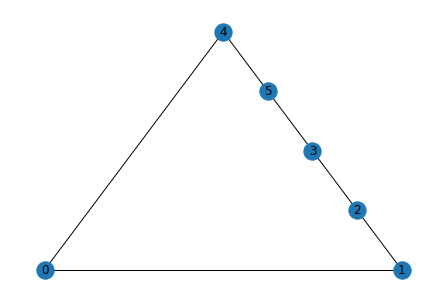

In [12]:
nx.draw(G, with_labels=True, pos=pos)

#### Trial run (rnd init)

In [13]:
fg_ = fg.FactorGraph(N,T,contacts,[],delta=1./(N))
fg_.update(maxit=1000, print_iter=print_iter, tol=1e-8, damp=0.)
fg_.reset_obs(obs)

Iteration 8 error 1.1763593571467723e-17

In [14]:
T_stop, _ = fg_.update(maxit=50000, print_iter=print_iter, tol=1e-8, damp=0.5)

Iteration 169 error 9.040445408686827e-098

#### Choose parameters

In [15]:
damping=0.
tol=1e-8
init_iter, jump1, addit_iter1, jump2, addit_iter2, iter = iter_selector(T_stop+1)


total iterations: 180


#### Initalize rnd BP

In [16]:
fg_ = fg.FactorGraph(N,T,contacts,[],delta=1./(N))
fg_.update(maxit=1000, print_iter=print_iter, tol=1e-8, damp=0.)
fg_.reset_obs(obs)

xx=np.arange(0,T+2)-1
yy = [fg_.marginals()]
yy_pair = [[fg_.pair_marginals().get_ij(i[0],i[1]) for i in list(G.edges)]]
yy_mess = [[fg_.get_messages().get_ij(i[0],i[1]) for i in directed_edges]]
lab = [f'Iteration: 0']
ymax=[0.01]
ymin=[0.001] 
xx_err=[0]
yy_err=[np.NaN]

Iteration 8 error 1.1763593571467723e-17

#### Run and save

In [17]:
it=0
it_sum = init_iter + addit_iter1 + addit_iter2
for i in np.arange(1,it_sum+1):    
    if i < init_iter: 
        it =it+1
        error_max, error_mean= fg_.iterate(damp=damping)
    elif i < init_iter + addit_iter1 :  
        j1 = rand_jump(jump1)
        it =it+j1
        error_max, error_mean = f_iterate(n=j1)
    else:  
        j2 = rand_jump(jump2)
        it =it+j2
        error_max, error_mean = f_iterate(n=j2)
    xx_err.append(it)
    lab.append(f'Iteration: {it}')
    yy.append(fg_.marginals())
    yy_pair.append([fg_.pair_marginals().get_ij(j[0],j[1]) for j in list(G.edges)])
    yy_mess.append([fg_.get_messages().get_ij(j[0],j[1]) for j in directed_edges])
    yy_err.append(error_mean)
    ym=ymin[-1]
    yM=ymax[-1]
    if (error_mean < ym) : ym = error_mean
    elif (error_mean > yM) : yM = error_mean
    ymin.append(ym)
    ymax.append(yM)

    #if (error_mean<tol): 
    #    print(f"Stopped at it={it}")
    #    break


#### Animated plot

In [18]:
print(f"N = {N}, E = {E}")

N = 6, E = 6


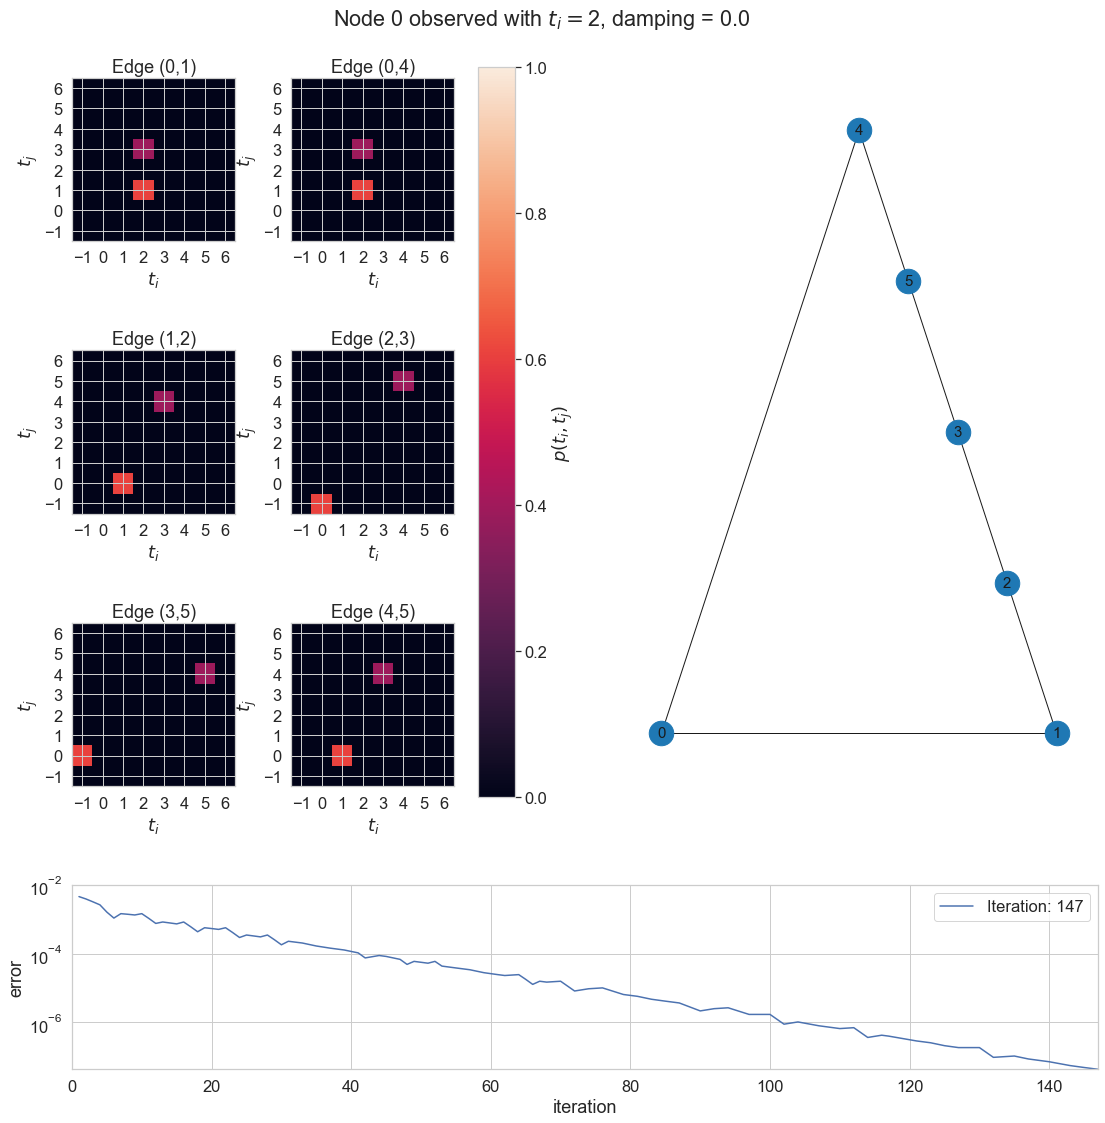

In [26]:
plot_marg(n_x=2,n_y=3) #n_x*n_y=N
#plot_pair_marg(n_x=2,n_y=3) #n_x*n_y=E
#plot_mess(n_x=2,n_y=3) #n_x*n_y=2*E

# Prove

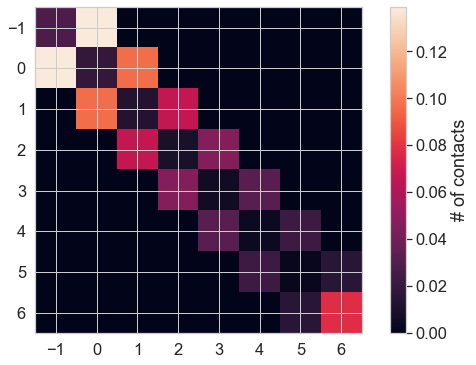

In [174]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

s = ax.imshow(yy_pair[0][0],extent=(-1.5,6.5,6.5,-1.5))

cbar = fig.colorbar(s, ax=ax)
ax.set_xticks(np.arange(-1,T+1))
cbar.set_label('# of contacts')
plt.show()

In [81]:
ax.set_xticks(np.arange(-2,T-1))

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])